In [14]:
#Pedro Rodrigues Santos
#RA: 2102790

In [15]:
#libs utilizadas em todo o projeto
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg

#lib para filtrar avisos
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Lendo os dados
BaseDados = pd.read_csv('Dados_Incendios.csv', encoding='latin-1')

#Verificando os dados
BaseDados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [17]:
#Verificando dados nulos
BaseDados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [18]:
#Estatisticas
BaseDados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [19]:
#Informações
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [20]:
#Verificando campos unicos
BaseDados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

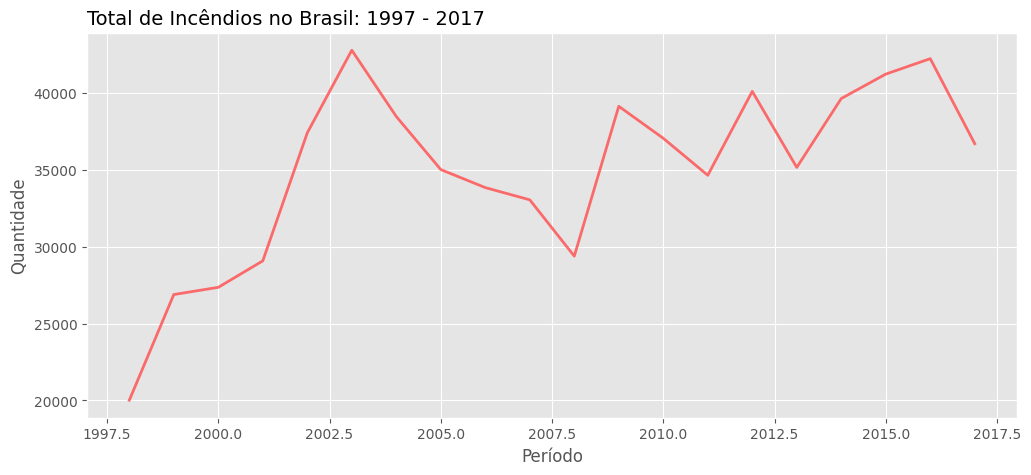

In [21]:
#Analise dos incêndios por ano
Analise = BaseDados.groupby(by=['year']).sum().reset_index()
Analise.head()

plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.title('Total de Incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

plt.ylabel('Quantidade')
plt.xlabel('Período');

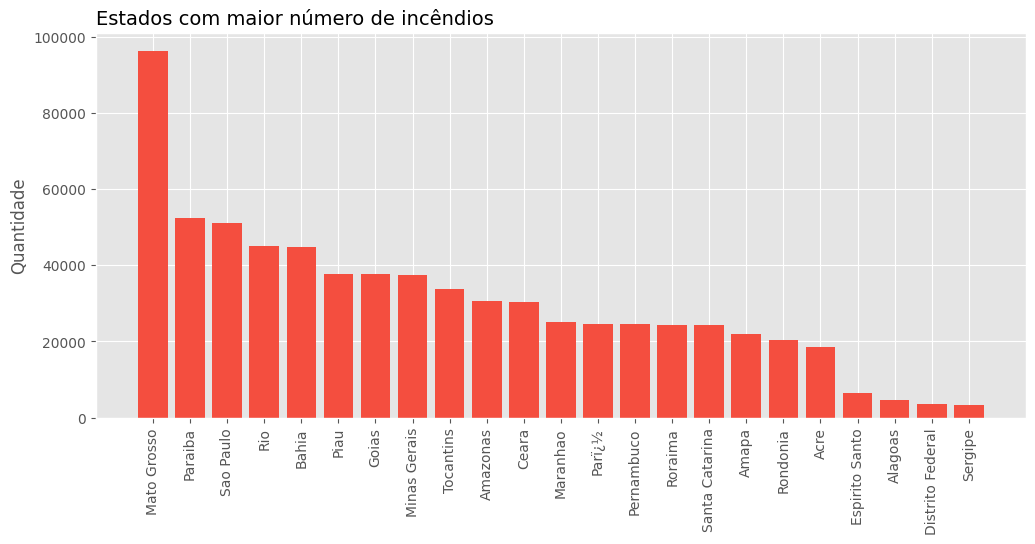

In [22]:
#Analise dos Incêndios por Estado
Analise2 = BaseDados.groupby(by= ['state']).sum().reset_index()[['state','number']].sort_values('number',ascending=False)
Analise2.head()

plt.figure(figsize=(12,5))
plt.title('Estados com maior número de incêndios', loc='left', fontsize=14)
plt.bar(Analise2.state, Analise2['number'], color='#f44e3f')
plt.ylabel('Quantidade')
plt.xticks(rotation=90);

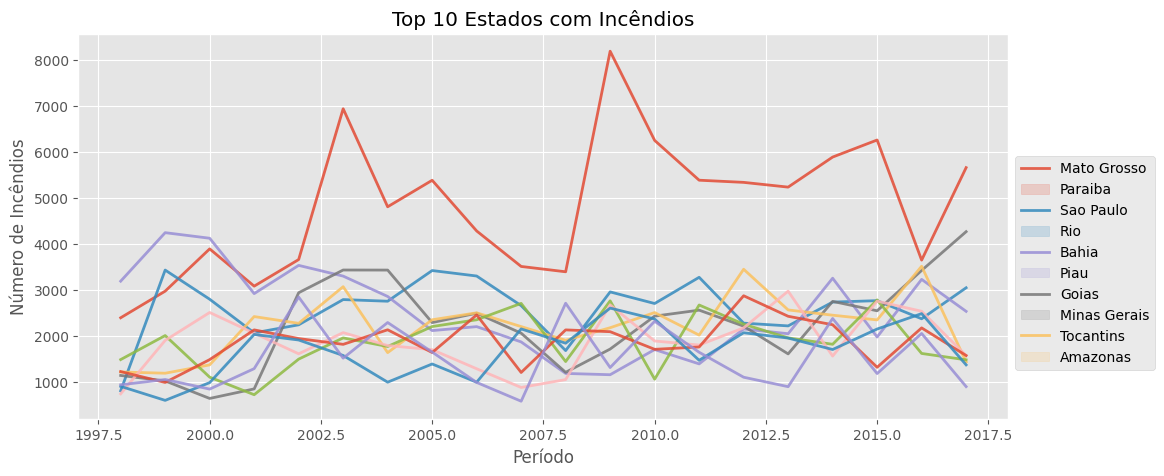

In [23]:
#Top 10 Estados com Incêndios
Lista = Analise2['state'][0:10].values
plt.figure(figsize=(12,5))
plt.title('Top 10 Estados com Incêndios')
for Coluna in Lista:
    Filtro = BaseDados.loc[BaseDados['state'] == Coluna]
    Local = Filtro.groupby(by=['year']).sum().reset_index()
    sns.lineplot(data=Local, x='year', y='number', lw=2, alpha=0.85)

plt.xlabel('Período')
plt.ylabel('Número de Incêndios')

plt.legend(Lista, bbox_to_anchor=(1, 0.7));

In [24]:
#Analise Geografica
Estados = Analise2.sort_values('state')['state'].values
Valores = Analise2.sort_values('state')['number'].values
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	-18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	-35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}
AnaliseGeografica = pd.DataFrame(Dicionario)
AnaliseGeografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [25]:
import plotly.express as px

px.density_mapbox(
    AnaliseGeografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-55.5555),
    zoom=3,
    mapbox_style='open-street-map',
    width= 1040,
    height= 650
)

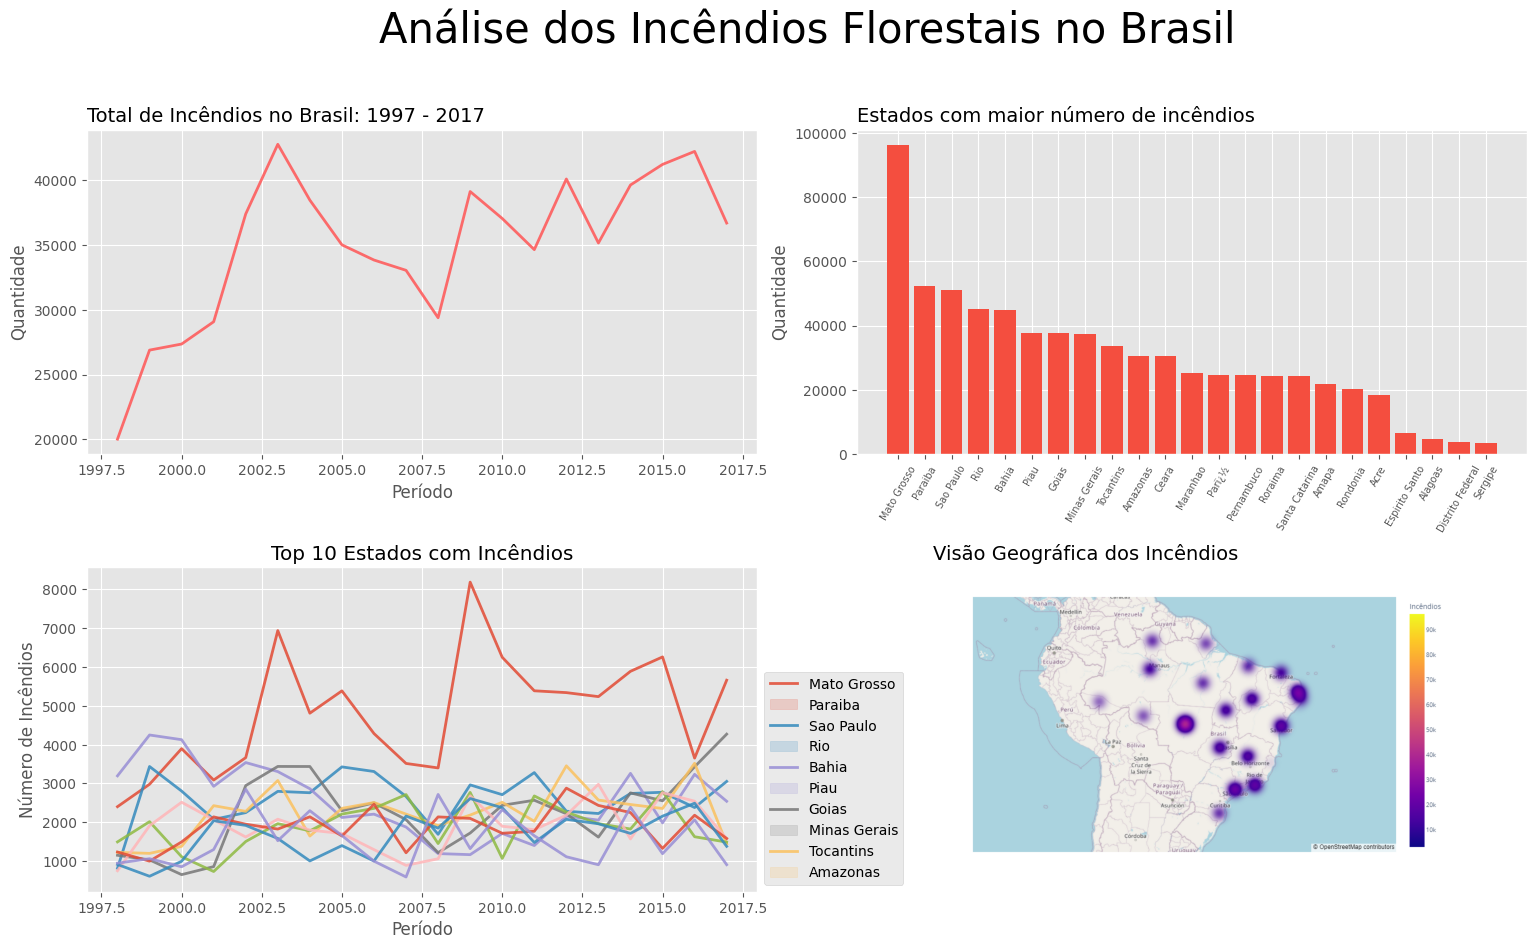

In [26]:
#Junção de todos os gráficos para analise completa
import matplotlib.image as mpimg

fig= plt.figure(figsize=(18,15))
ax= [None for _ in range(6)]

ax[0]= plt.subplot2grid((3,4), (0,0), colspan=2)
plt.style.use('ggplot')
plt.title('Total de Incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

plt.ylabel('Quantidade')
plt.xlabel('Período');

ax[1]= plt.subplot2grid((3,4), (0,2), colspan=2)
plt.title('Estados com maior número de incêndios', loc='left', fontsize=14)
plt.bar(Analise2.state, Analise2['number'], color='#f44e3f')
plt.ylabel('Quantidade')
plt.xticks(rotation=60, fontsize=7);

ax[2]= plt.subplot2grid((3,4), (1,0), colspan=2)
plt.title('Top 10 Estados com Incêndios')
for Coluna in Lista:
    Filtro = BaseDados.loc[BaseDados['state'] == Coluna]
    Local = Filtro.groupby(by=['year']).sum().reset_index()
    sns.lineplot(data=Local, x='year', y='number', lw=2, alpha=0.85)
plt.xlabel('Período')
plt.ylabel('Número de Incêndios')
plt.legend(Lista, bbox_to_anchor=(1, 0.7));

ax[3]= plt.subplot2grid((3,4), (1,2), colspan=2)
mapa= mpimg.imread('map.PNG')
plt.imshow(mapa)
plt.axis('off')
plt.title('Visão Geográfica dos Incêndios', loc='left', fontsize=14, fontweight=0)
fig.tight_layout()

plt.suptitle('Análise dos Incêndios Florestais no Brasil', fontsize=30)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.35)